
# Volume 2: OpenGym



<Name\>
<Class\>
<Date\>





In [1]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym[classic_control]
!pip install gym-toytext

!sudo apt-get install python3.10
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!sudo update-alternatives --set python3 /usr/bin/python3.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 33.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 KB 10.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827651 sha256=6871c520ef3e6c45acb16c429558d8c06672377c2d9b468f5d3da5d8aea14207
  Stored in directory: /root/.cache/pip/wheels/af/2b/30/5e78b8b9599f2a2286a582b8da80594f654bf0e18d825a4405
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
Reading package lists... Done
Building dependency tree       
Reading state informatio

In [2]:
import gym
import gym_toytext
import random
import numpy as np
from IPython import display
from matplotlib import pyplot as plt

In [3]:
from gym import envs

# Problem 1

*   Implement `random_blackjack()`.
*   Run the game 50,000 times and print the percentage of games that are wins.



In [4]:
# Problem 1
def random_blackjack(n):
    """
    Play a random game of Blackjack. Determine the
    percentage the player wins out of n times.
    Parameters:
        n (int): number of iterations
    Returns:
        percent (float): percentage that the player
                         wins
    """
    
    # Create environment
    env = gym.make('Blackjack-v1')
    env.reset()

    # Initialize reward
    reward_count = 0

    # Take random actions until the game is terminated
    for i in range(0,n):
      done = False
      env.reset()
      while(not done):
        random_action = env.action_space.sample()
        observation, reward, done, truncated, info = env.step(random_action)

    # Add to reward if you win

      if reward == 1:
        reward_count +=1

    # Calculate percentage; close environment; return value
    percentage = reward_count/n
    env.close()
    return percentage
        






In [5]:
print("Win Percentage:")

print(random_blackjack(50000))

Win Percentage:
0.28306


# Problem 2

* Implement `blackjack()`.
* For `n` = 1, 2, ..., 21, plot the win percentage after 10,000 games of Blackjack.
* Identify which value of `n` gives the highest win rate.

In [6]:
# Problem 2
def blackjack(n=11):
    """
    Play blackjack with naive algorithm.
    Parameters:
        n (int): maximum accepted player hand
    Return:
        percent (float): percentage of 10000 iterations
                         that the player wins
    """


    # Initialize environment and number of wins
    env = gym.make('Blackjack-v1')
    env.reset()
    reward_count = 0

    # Run this iteration 10,000 times
    for i in range(0,10000):
      done = False
      observation, info = env.reset()
      while not done:
        # Only keep playing, if hand is less than or equal to n
        if observation[0] <= n:
          action = 1
        else:
          action = 0
          
        # Perform action
        observation, reward, done, truncated, info = env.step(action)
  
      # If win, add to win score
      if reward == 1:
        reward_count +=1

    # Calculate percentage, close environment, return value
    percentage = reward_count/10000
    env.close()
    return percentage


    

In [7]:
# Initialize arrays
win_values = []
N = []

# Make array of max numbers
for i in range(1,22):
  N.append(i)

# Make array of Win Percentages
for j in range(1,22):
  win_values.append(blackjack(j))


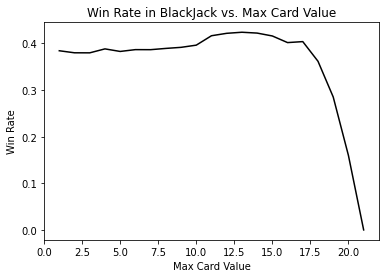

In [8]:
# Plot Win Rate in Blackjack vs. Max Card Value

plt.plot(np.array(N), np.array(win_values), 'k-')
plt.title("Win Rate in BlackJack vs. Max Card Value")
plt.xlabel("Max Card Value")
plt.ylabel("Win Rate")
plt.show()

In [34]:
# Print out value with Highest Win Rate

print("Value with Highest Win Rate:")

print(np.argmax(win_values))

Value with Highest Win Rate:
12


*Identify which value(s) give the highest 

*   List item
*   List item

win-rate here*

# Problem 3

* Implement `cartpole()`.
* Render the game and run your function once.
* Run Cartpole 100 times (without rendering) and print out the average number of steps before it terminates.

In [9]:
# Problem 3
def cartpole(render=False):
    """
    Solve CartPole-v1 by checking the velocity
    of the tip of the pole.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): number of steps or iterations
                              to solve the environment
    """


    # Initialize environment and variables
    env = gym.make('CartPole-v1', render_mode = "rgb_array")
    steps = 0
    observation, info = env.reset()
    done = False

    # If we need to render, render the environment
    if render:
        img = plt.imshow(env.render())

    # While the environment is not terminated
    while not done:

      # If velocity of tip of pole is negative, move cart negative
      if observation[3] < 0:
        action = 0
      
      # If positive, move cart positive
      else:
        action = 1

      # Perform action
      observation, reward, done, truncated, info = env.step(action)

      # Add to number of steps
      if reward == 1:
        steps += 1

      # Update visualization
      if render:
        img.set_data(env.render())
        display.display(plt.gcf())
        display.clear_output(wait = True)


    # Return steps
    return steps








   

203

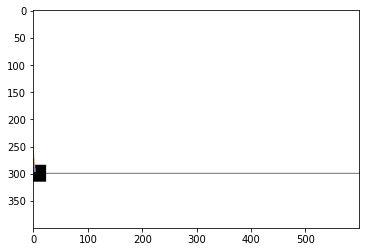

In [10]:
# Run game a single time and render the environment at each step
cartpole(True)

In [11]:
# Run function 100 times and print average number of steps

total_steps = 0
for i in range(0,100):
  total_steps += cartpole()

print(total_steps/100)

192.86


# Problem 4

* Implement `car()`.
* Render the game and run your function once.
* Run MountainCar 100 times (without rendering) and print out the average number of steps before it terminates.

In [12]:
# Problem 4
def car(render=False):
    """
    Solve MountainCar-v0 by checking the position
    of the car.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): number of steps or iterations
                              to solve the environment
    """

    # Initialize environment and variables
    env = gym.make('MountainCar-v0', render_mode = "rgb_array")
    steps = 0
    observation, info = env.reset()
    done = False

    # If we are rendering, initialize rendering
    if render:
      img = plt.imshow(env.render())

    # Run this loop, while you are not terminated
    while not done:
      
      # If position is less than -0.35
      if observation[0] > -0.35:

        # If velocity less than 0, go neutral
        if observation[1] < 0:
          action = 1
        
        # Else, go forward
        else:
          action = 2

      # Else, 
      else:
        
        # If velocity is greater than 0, go neutral
        if observation[1] > 0:
          action = 1
        
        # Else, go backward
        else:
          action = 0

      # Run action
      observation, reward, done, truncated, info = env.step(action)

      # Add step, if we do not reach the flag
      if reward == -1:
        steps += 1

      # Update visualization
      if render:
        img.set_data(env.render())
        display.display(plt.gcf())
        display.clear_output(wait = True)

  
    return steps

    

179


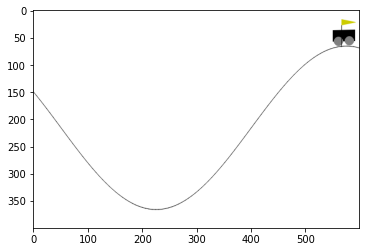

In [13]:
print(car(render = True))

In [14]:
# Run the game here and print average steps to termination
sum = 0
for i in range(0,100):
  sum += car()

print(sum/100)


181.13


## Helper Function for Problem 5

In [15]:
def find_qvalues(env,alpha=.1,gamma=.6,epsilon=.1):
    """
    Use the Q-learning algorithm to find qvalues.
    Parameters:
        env (str): environment name
        alpha (float): learning rate
        gamma (float): discount factor
        epsilon (float): maximum value
    Returns:
        q_table (ndarray nxm)
    """
    # Make environment
    env = gym.make(env)
    # Make Q-table
    q_table = np.zeros((env.observation_space.n, env.action_space.n))

    # Train
    for i in range(1,100001):
        # Reset state
        state, info = env.reset()

        epochs, penalties, reward, = 0,0,0
        done = False

        while not done:
            # Accept based on alpha
            if random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])

            # Take action
            next_state, reward, done, truncated, info = env.step(action)

            # Calculate new qvalue
            old_value = q_table[state,action]
            next_max = np.max(q_table[next_state])

            new_value = (1-alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            # Check if penalty is made
            if reward == -10:
                penalties += 1

            # Get next observation
            state = next_state
            epochs += 1

        # Print episode number
        if i % 100 == 0:
            display.clear_output(wait=True)
            print(f"Episode: {i}")

    print("Training finished.")
    return q_table

# Problem 5

* Initialize the "`Taxi-v3`" environment (without rendering), act randomly until it terminates, and print the total reward
* Render the "`Taxi-v3`" environment, use the Q-table to act optimally until it terminates, and print the total reward
* Implement `taxi()`, then use it to print the average total reward for each algorithm.


In [19]:
# Random actions Taxi game

def rand_taxi():

  # Initialize environment and variables
  env_taxi = gym.make('Taxi-v3')
  env_taxi.reset()
  reward_count = 0
  done = False

  # Run this loop while we have not terminated
  while not done:
    random_action = env_taxi.action_space.sample()
    observation, reward, done, truncated, info = env_taxi.step(random_action)

    # Add reward to reward count
    reward_count += reward

  # Return reward
  return reward_count






In [20]:
# Print total reward


print(rand_taxi())

-947


In [21]:
# Q-table actions Taxi game

Q_table = find_qvalues("Taxi-v3")
print(Q_table)







Episode: 100000
Training finished.
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -2.4183705   -2.36395108  -2.41837066  -2.36395103  -2.27325184
  -11.36395106]
 [ -1.87014382  -1.45024002  -1.87014394  -1.45024002  -0.7504
  -10.45023874]
 ...
 [ -1.02365376   0.41599802  -0.92753245  -1.0971863   -1.93728288
   -4.78560017]
 [ -2.15549593  -2.12207016  -2.14540969  -2.12206849  -6.74556192
   -4.45416644]
 [  3.35023413   1.18072205   2.23325879  11.          -2.86741215
   -2.47201196]]


In [22]:
def q_taxi(q_table, render = False):

  # Initialize environment and reward counter
  env_taxi = gym.make('Taxi-v3', render_mode ="rgb_array")
  observation, info = env_taxi.reset()
  reward_count = 0
  done = False

  # Initialize rendering
  if render:
    img = plt.imshow(env_taxi.render())

  # Iterate through this loop while environment is not terminated
  while not done:
    # Do action
    action = np.argmax(q_table[observation,:])
    observation, reward, done, truncated, info = env_taxi.step(action)

    # Add reward Count
    reward_count += reward

    # Update visualization
    if render:
      img.set_data(env_taxi.render())
      display.display(plt.gcf())
      display.clear_output(wait = True)

  # Return reward
  return reward_count





10


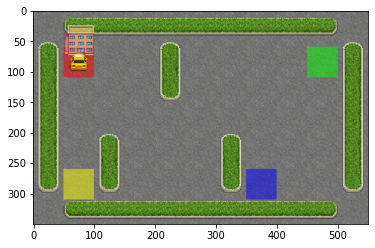

In [23]:
print(q_taxi(Q_table, render = True))

In [24]:
def taxi(q_table):
    """
    Compare naive and q-learning algorithms.
    Parameters:
        q_table (ndarray nxm): table of qvalues
    Returns:
        naive (float): mean reward of naive algorithm
                       of 1000 runs
        q_reward (float): mean reward of Q-learning algorithm
                          of 1000 runs
    """

    # Initialze rewards for naive and q
    naive_rewards = 0
    q_rewards = 0
    
    for i in range(1000):
      naive_rewards += rand_taxi()
      q_rewards += q_taxi(q_table)

     
    
    return float(naive_rewards/1000), float(q_rewards/1000)




In [33]:
# Print the average rewards of the Taxi game for both algorithms run 1000 times
naive_mean, q_mean = taxi(Q_table)

print(f"Naive Mean = {naive_mean} and Q-Mean = {q_mean}")




Naive Mean = -9612.611 and Q-Mean = 7.961
